In [128]:
import pandas as pd
from pathlib import Path
import os

print("--- Настройка Git и клонирование репозитория ---")

!git --version

!git config --global user.name "khan-MR"
!git config --global user.email "ddla7246@gmail.com"

repository_url = "https://github.com/khan-MR/Sale_Analytics_Project.git"
repository_name = "Sale_Analytics_Project"

%cd /content/
print(f"Текущая рабочая директория перед очисткой: {os.getcwd()}")

!rm -rf "{repository_name}"
print(f"Старая папка '{repository_name}' удалена (если существовала).")

!git clone {repository_url}
print(f"Репозиторий '{repository_name}' успешно склонирован в /content/{repository_name}.")

print("\n--- Копирование файлов в склонированный репозиторий ---")

notebook_src_path = "/content/drive/MyDrive/Colab_Notebooks/Sale_analytics.ipynb"

raw_csv_src_path = "Year_2009_2010.csv"

repo_dest_path = Path(f"/content/{repository_name}/")

if Path(notebook_src_path).exists():
  !cp "{notebook_src_path}" "{repo_dest_path / Path(notebook_src_path).name}"
  print(f"Ноутбук Sale_analytics.ipynb скопирован в {repo_dest_path}")
else:
  print(f"ВНИМАНИЕ: Ноутбук не найден по пути: {notebook_src_path}. Убедитесь, что Google Drive примонтирован и путь корректен.")

if Path(raw_csv_src_path).exists():
  !cp "{raw_csv_src_path}" "{repo_dest_path / Path(raw_csv_src_path).name}"
  print(f"Файл Year_2009_2010.csv скопирован в {repo_dest_path}")
else:
  print(f"ВНИМАНИЕ: CSV файл не найден по пути: {raw_csv_src_path}. Убедитесь, что он загружен или на Drive.")

print("\n--- Переход в директорию репозитория ---")
%cd {repository_name}
print(f"Текущая рабочая директория: {os.getcwd()}")

--- Настройка Git и клонирование репозитория ---
git version 2.34.1
/content
Текущая рабочая директория перед очисткой: /content
Старая папка 'Sale_Analytics_Project' удалена (если существовала).
Cloning into 'Sale_Analytics_Project'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 18.34 MiB | 17.42 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Репозиторий 'Sale_Analytics_Project' успешно склонирован в /content/Sale_Analytics_Project.

--- Копирование файлов в склонированный репозиторий ---
Ноутбук Sale_analytics.ipynb скопирован в /content/Sale_Analytics_Project
Файл Year_2009_2010.csv скопирован в /content/Sale_Analytics_Project

--- Переход в директорию репозитория ---
/content/Sale_Analytics_Project
Текущая рабочая директория: /content/Sale_Analytics_Project


In [130]:
from google.colab import userdata

try:
  GIT_TOKEN = userdata.get('GITHUB_TOKEN')
  GIT_USERNAME = "khan-MR"
  print("Токен GitHub успешно загружен из секретов Colab.")
except Exception as e:
  print(f"ОШИБКА: Не удалось загрузить токен GitHub из секретов Colab. Убедитесь, что секрет 'GITHUB_TOKEN' существует и доступен. {e}")
  raise ValueError("Отсутствует токен GitHub для аутентификации.")

%cd /content/{repository_name}
print(f"Текущая рабочая директория для Git-операций: {os.getcwd()}")

!git add .

!git commit --amend --no-edit

!git push --force https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{repository_name}.git main

print("\nПроект успешно отправлен на GitHub (или произошла ошибка, если она есть в выводе выше).")

Токен GitHub успешно загружен из секретов Colab.
/content/Sale_Analytics_Project
Текущая рабочая директория для Git-операций: /content/Sale_Analytics_Project
[main 23c6939] Initial commit: Added Sale Analytics Notebook and raw data
 Date: Mon Jul 7 08:20:43 2025 +0000
 8 files changed, 1029644 insertions(+)
 create mode 100644 Sale_analytics.ipynb
 create mode 100644 Year_2009_2010.csv
 create mode 100644 cleaned_sales.csv
 create mode 100644 cleaned_sales.parquet
 create mode 100644 monthly_revenue_trend.png
 create mode 100644 revenue_by_weekday.png
 create mode 100644 top_10_products_revenue.png
 create mode 100644 top_5_countries_revenue.png
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 2 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (10/10), 18.34 MiB | 38.02 MiB/s, done.
Total 10 (delta 1), reused 7 (delta 1), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
remote: warning: See https://gh.io/lfs

In [103]:
# Этап 1: Загрузка и первичное ознакомление с данными
# Указываем путь к исходному файлу CSV. Использование Path обеспечивает лучшую совместимость с различными операционными системами.
RAW_PATH = Path('Year_2009_2010.csv')

# Загружаем данные из CSV-файла в DataFrame.
# sep=',': разделитель столбцов.
# parse_dates=['InvoiceDate']: Автоматически преобразуем столбец 'InvoiceDate' в формат даты/времени.
# dayfirst=False: Указываем, что в дате месяц идет раньше дня (MM/DD/YYYY).
# encoding='latin1': Специфическая кодировка, которая часто встречается в старых CSV файлах, позволяет избежать ошибок при чтении символов.
# dtype={...}: Явно задаем типы данных для столбцов для оптимизации использования памяти и предотвращения нежелательных автоматических преобразований.
# 'string' для текстовых данных, 'Int32' для целых чисел с пропусками (nullable integer), 'float32' для чисел с плавающей точкой.
# low_memory=False: Позволяет pandas загружать файл целиком, что может потреблять больше памяти, но часто предотвращает ошибки DtypeWarning для смешанных типов в столбцах.

df = pd.read_csv(
  RAW_PATH,
  sep=',',
  parse_dates=['InvoiceDate'],
  dayfirst=False,
  encoding='latin1',
  dtype={
    'Invoice': 'string',
    'StockCode': 'string',
    'Description': 'string',
    'Quantity': 'Int32',
    'Price': 'float32',
    'Customer ID': 'string',
    'Country': 'string'
  },
  low_memory=False
)

print("Прочитано строк:", len(df))
print("Первые 5 строк исходных данных:")
display(df.head(5))

Прочитано строк: 525461
Первые 5 строк исходных данных:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [104]:
# Этап 2: Стандартизация названий колонок
# Приводим названия колонок к единому, удобному для работы стилю (snake_case).
# .str.strip(): Удаляем начальные/конечные пробелы.
# .str.lower(): Преобразуем все символы в нижний регистр.
# .str.replace(r'\s+', '_', regex=True): Заменяем один или несколько пробелов на одиночное подчеркивание.
# .str.replace(r'[^a-z0-9_]', '', regex=True): Удаляем все символы, кроме букв (a-z), цифр (0-9) и подчеркиваний.
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'\s+', '_', regex=True)
      .str.replace(r'[^a-z0-9_]', '', regex=True)
)
print("Новые названия колонок:", df.columns.tolist())

Новые названия колонок: ['invoice', 'stockcode', 'description', 'quantity', 'invoicedate', 'price', 'customer_id', 'country']


In [105]:
# Этап 3: Удаление полных дубликатов
# Проверяем и удаляем строки, которые являются полными дубликатами.
# Полные дубликаты могут указывать на ошибки в данных или повторные записи, которые могут исказить анализ (например, завысить выручку).
print("\nВсего строк до удаления дубликатов:", len(df))
dups = df.duplicated().sum()
print("Найдено дубликатов:", dups)

if dups:
  df = df.drop_duplicates()
  print("Строк после удаления дубликатов:", len(df))


Всего строк до удаления дубликатов: 525461
Найдено дубликатов: 6865
Строк после удаления дубликатов: 518596


In [106]:
# Этап 4: Разделение продаж и возвратов
# Разделяем операции на продажи и возвраты на основе префикса 'C' в номере счета ('invoice').
# Номера счетов, начинающиеся с 'C', обозначают отмены или возвраты.
# Создаем копии DataFrame, чтобы избежать SettingWithCopyWarning при дальнейших операциях.
returns = df[df['invoice'].str.startswith('C', na=False)].copy() # na=False обрабатывает NaN как не начинающийся с 'C'
sales   = df[~df['invoice'].str.startswith('C', na=False)].copy()

print("\nЧисло возвратов:", len(returns))
print("Число продаж (без возвратов):", len(sales))


Число возвратов: 10182
Число продаж (без возвратов): 508414


In [107]:
# Этап 5: Фильтрация некорректных значений в продажах
# Удаляем строки, где количество ('quantity') или цена ('price') некорректны (меньше или равны 0).
# Отрицательные или нулевые значения обычно указывают на ошибки ввода, возвраты (которые уже отделены) или другие нерелевантные для анализа продаж операции.
before = len(sales)
sales = sales[(sales['quantity'] > 0) & (sales['price'] > 0)]
print(f"Убрали {before - len(sales)} некорректных строк (quantity <=0 или price <=0), осталось {len(sales)}")

Убрали 3684 некорректных строк (quantity <=0 или price <=0), осталось 504730


In [108]:
# Этап 6: Обработка пропусков (NaN)
# Анализируем и обрабатываем пропущенные значения, чтобы обеспечить чистоту данных для анализа.
print("\nКоличество пропущенных значений до обработки:")
print(sales.isna().sum())

# Заполняем пропуски в 'customer_id' значением 'Unknown'. Это позволяет сохранить записи о продажах, не имеющих идентифицированного клиента и включить их в общий объем выручки.
sales['customer_id'] = sales['customer_id'].fillna('Unknown')

# Удаляем строки с пропусками в ключевых столбцах: 'invoice', 'stockcode', 'invoicedate'.
# Эти столбцы критически важны для идентификации транзакции и товара, и пропуски в них делают запись непригодной для анализа продаж.
sales = sales.dropna(subset=['invoice', 'stockcode', 'invoicedate'])
print("\nКоличество пропущенных значений после обработки:")
print(sales.isna().sum())


Количество пропущенных значений до обработки:
invoice             0
stockcode           0
description         0
quantity            0
invoicedate         0
price               0
customer_id    103814
country             0
dtype: int64

Количество пропущенных значений после обработки:
invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
dtype: int64


In [109]:
# Этап 7: Оптимизация типов данных
# Повторно приводим типы данных для оптимизации использования памяти, особенно после операций очистки. Использование 'category' для столбцов с ограниченным числом уникальных значений значительно сокращает потребление памяти.
sales = sales.astype({
  'stockcode': 'category',
  'description': 'string',  # string для текстовых описаний
  'customer_id': 'string',
  'country': 'category'
})
print("\nИнформация о DataFrame после приведения типов:")
sales.info()


Информация о DataFrame после приведения типов:
<class 'pandas.core.frame.DataFrame'>
Index: 504730 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      504730 non-null  string        
 1   stockcode    504730 non-null  category      
 2   description  504730 non-null  string        
 3   quantity     504730 non-null  Int32         
 4   invoicedate  504730 non-null  datetime64[ns]
 5   price        504730 non-null  float32       
 6   customer_id  504730 non-null  string        
 7   country      504730 non-null  category      
dtypes: Int32(1), category(2), datetime64[ns](1), float32(1), string(3)
memory usage: 25.2 MB


In [110]:
# Этап 8: Добавление вычисляемых полей для анализа
# Создаем новые, производные колонки, которые будут полезны для агрегации и визуализации.

# 1. 'revenue': Выручка с каждой позиции (количество * цена).
sales['revenue'] = sales['quantity'] * sales['price']

# 2. 'date': Дата без времени. Удобно для группировок по дням.
sales['date'] = sales['invoicedate'].dt.date

# 3. 'month', 'quarter', 'weekday': Временные признаки для анализа сезонности и поведения по дням недели.
# .dt.to_period('M'): Преобразует в формат "Период" (например, 2009-12), удобен для группировок.
# .dt.day_name(): Возвращает полное название дня недели (например, 'Tuesday').
sales['month']   = sales['invoicedate'].dt.to_period('M')
sales['quarter'] = sales['invoicedate'].dt.to_period('Q')
sales['weekday'] = sales['invoicedate'].dt.day_name()
print("\nПервые 5 строк с добавленными вычисляемыми полями:")
print(sales[['revenue', 'date', 'month', 'weekday']].head())


Первые 5 строк с добавленными вычисляемыми полями:
      revenue        date    month  weekday
0   83.399998  2009-12-01  2009-12  Tuesday
1        81.0  2009-12-01  2009-12  Tuesday
2        81.0  2009-12-01  2009-12  Tuesday
3  100.799995  2009-12-01  2009-12  Tuesday
4        30.0  2009-12-01  2009-12  Tuesday


In [111]:
# Этап 9: Обработка специфического StockCode 'M'
# Выявление и удаление строк, связанных с 'StockCode' = 'M' (Manual).
# Эти записи часто используются для ручных корректировок, транспортных расходов или скидок, а не для продажи конкретных товаров. Поскольку точное назначение этих записей неизвестно и они могут искажать анализ продуктовых продаж, их исключают.
print("\nАнализ и удаление записей с StockCode 'M':")
initial_len = len(sales)
# Проверим, сколько строк с таким кодом
manual_m_count = sales[sales['stockcode'] == 'M'].shape[0]
print(f"Найдено {manual_m_count} строк с stockcode 'M'.")

# Убираем код 'M' из DataFrame для анализа чистых продаж товаров.
sales = sales[sales['stockcode'] != 'M'].copy()
print(f"Удалено {manual_m_count} строк. Строк после удаления: {len(sales)}")


Анализ и удаление записей с StockCode 'M':
Найдено 550 строк с stockcode 'M'.
Удалено 550 строк. Строк после удаления: 504180


In [112]:
# Этап 10: Сохранение очищенного датасета
# Сохраняем обработанные данные для дальнейшего использования, чтобы не повторять каждый раз этапы очистки. Формат Parquet выбран как более эффективный для хранения и чтения данных по сравнению с CSV (компактнее, быстрее, сохраняет типы данных).
from pathlib import Path

# Создаем директории, если они не существуют.
clean_path = Path('cleaned_sales.parquet')

# Сохраняем в Parquet
sales.to_parquet(clean_path, index=False) # index=False предотвращает сохранение индекса DataFrame как отдельной колонки.
print(f"\nОчищенный датасет сохранён в: {clean_path}")

# Дополнительно сохраняем в CSV для универсальной совместимости, если кому-то нужен обычный CSV.
# encoding='utf-8-sig' обеспечивает корректное отображение кириллицы в Excel.
sales.to_csv('cleaned_sales.csv', index=False, encoding='utf-8-sig')
print("Также сохранён в CSV как cleaned_sales.csv")


Очищенный датасет сохранён в: cleaned_sales.parquet
Также сохранён в CSV как cleaned_sales.csv


In [113]:
# Этап 11: Финальная валидация очищенного датасета
# Проводим окончательную проверку качества данных после всех этапов очистки.
print("\n--- Финальная валидация очищенного датасета ---")
print("Информация о финальном DataFrame:")
print(sales.info())
print("\nПустых значений в ключевых колонках ('invoice','stockcode','invoicedate'):", sales[['invoice','stockcode','invoicedate']].isna().sum().sum())
print("Дубликатов осталось:", sales.duplicated().sum())
print("Все значения 'revenue' > 0?", (sales['revenue'] > 0).all()) # Проверяем, что все рассчитанные выручки положительны.
print("Первые 10 строк финального очищенного датасета:")
display(sales.head(10))


--- Финальная валидация очищенного датасета ---
Информация о финальном DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 504180 entries, 0 to 525460
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      504180 non-null  string        
 1   stockcode    504180 non-null  category      
 2   description  504180 non-null  string        
 3   quantity     504180 non-null  Int32         
 4   invoicedate  504180 non-null  datetime64[ns]
 5   price        504180 non-null  float32       
 6   customer_id  504180 non-null  string        
 7   country      504180 non-null  category      
 8   revenue      504180 non-null  Float64       
 9   date         504180 non-null  object        
 10  month        504180 non-null  period[M]     
 11  quarter      504180 non-null  period[Q-DEC] 
 12  weekday      504180 non-null  object        
dtypes: Float64(1), Int32(1), category(2), datetime64[ns](1),

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,revenue,date,month,quarter,weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.399998,2009-12-01,2009-12,2009Q4,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01,2009-12,2009Q4,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01,2009-12,2009Q4,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.799995,2009-12-01,2009-12,2009Q4,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12-01,2009-12,2009Q4,Tuesday
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.599999,2009-12-01,2009-12,2009Q4,Tuesday
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12-01,2009-12,2009Q4,Tuesday
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,59.499998,2009-12-01,2009-12,2009Q4,Tuesday
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.599999,2009-12-01,2009-12,2009Q4,Tuesday
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085,United Kingdom,45.0,2009-12-01,2009-12,2009Q4,Tuesday


In [114]:
# Этап 12: Загрузка и подготовка данных для EDA (Exploratory Data Analysis)
# Загружаем уже очищенные данные из Parquet для дальнейшего анализа и визуализации.
# Это позволяет начать EDA сразу с чистых данных без повторения этапов предобработки.
df = pd.read_parquet('cleaned_sales.parquet')

import matplotlib.pyplot as plt


--- Генерация графиков для EDA ---


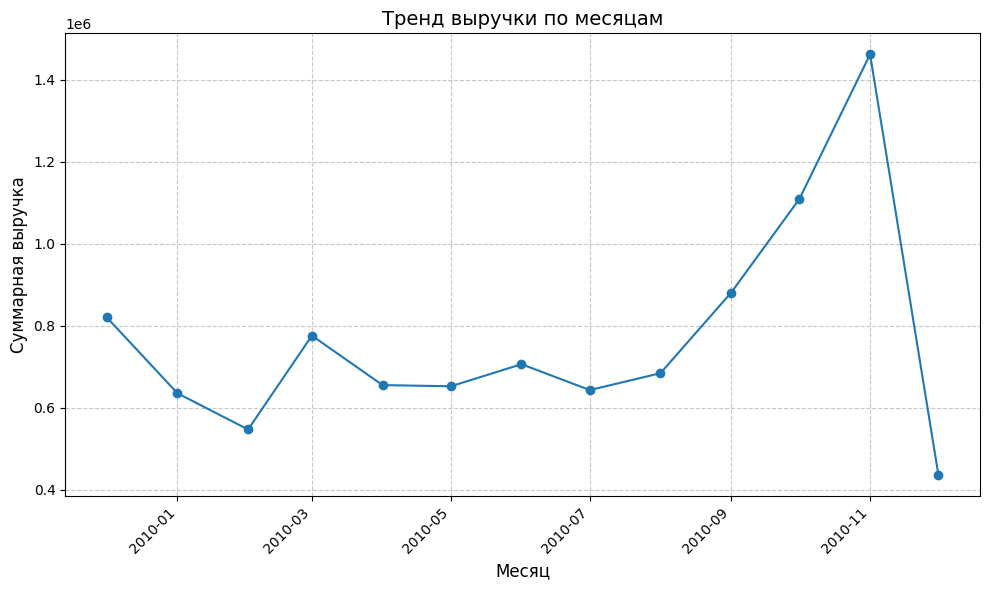

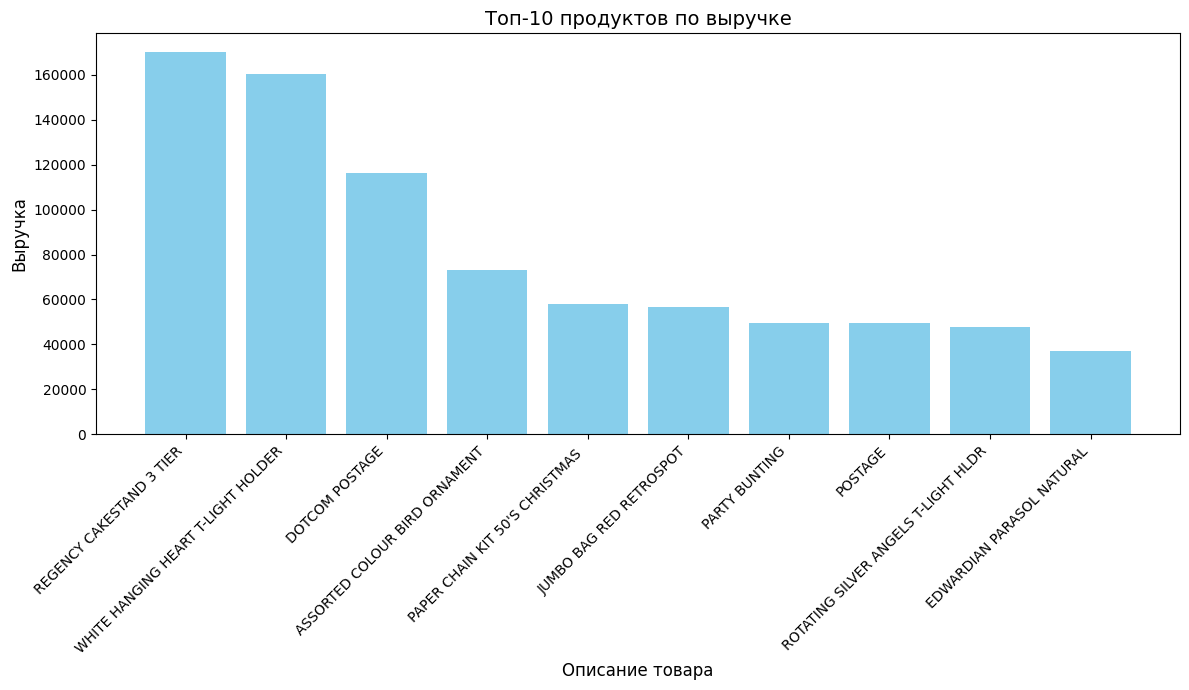

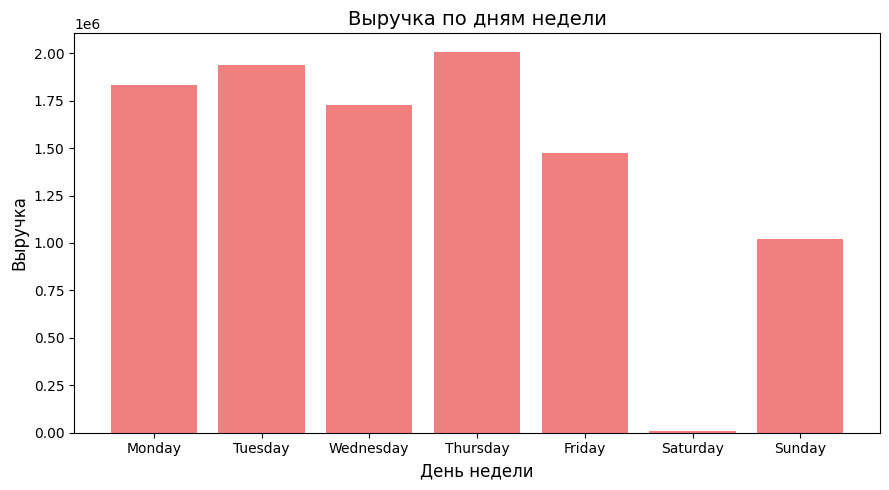

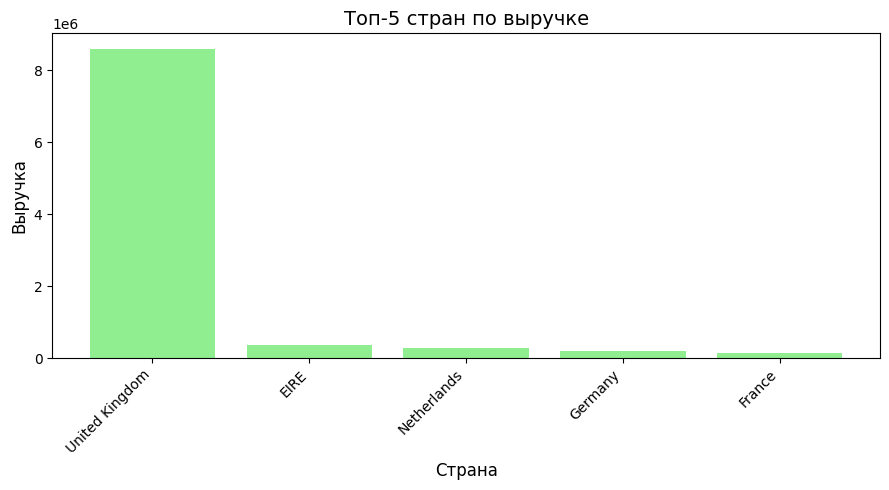

Все графики успешно сгенерированы и сохранены в виде PNG-файлов.


In [115]:

# Этап 13: Визуализация ключевых метрик продаж
# Используем ранее определенные функции для построения графиков.

def plot_monthly_revenue_trend(dataframe):
    """
    Строит график тренда выручки по месяцам.
    Цель: выявить сезонность и общую динамику продаж во времени.
    """
    monthly = dataframe.groupby('month')['revenue'].sum().reset_index()
    monthly['month'] = monthly['month'].dt.to_timestamp() # Конвертируем Period в Timestamp для plot

    plt.figure(figsize=(10, 6))
    plt.plot(monthly['month'], monthly['revenue'], marker='o', linestyle='-')
    plt.title('Тренд выручки по месяцам', fontsize=14)
    plt.xlabel('Месяц', fontsize=12)
    plt.ylabel('Суммарная выручка', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('monthly_revenue_trend.png')
    plt.show()

def plot_top_n_products(dataframe, n=10):
    """
    Строит столбчатую диаграмму топ-N продуктов по выручке.
    Цель: определить наиболее прибыльные товары/услуги.
    """
    top_n = (
        dataframe.groupby('description', observed=True)['revenue']
                 .sum()
                 .sort_values(ascending=False)
                 .head(n)
                 .reset_index()
    )

    plt.figure(figsize=(12, 7))
    plt.bar(top_n['description'], top_n['revenue'], color='skyblue')
    plt.title(f'Топ-{n} продуктов по выручке', fontsize=14)
    plt.xlabel('Описание товара', fontsize=12)
    plt.ylabel('Выручка', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(f'top_{n}_products_revenue.png')
    plt.show()

def plot_revenue_by_weekday(dataframe):
    """
    Строит столбчатую диаграмму выручки по дням недели.
    Цель: выявить зависимость продаж от дня недели для оптимизации работы магазина.
    """
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_rev = (
        dataframe.groupby('weekday', observed=True)['revenue']
                 .sum()
                 .reindex(order)
                 .reset_index()
    )

    plt.figure(figsize=(9, 5))
    plt.bar(weekday_rev['weekday'], weekday_rev['revenue'], color='lightcoral')
    plt.title('Выручка по дням недели', fontsize=14)
    plt.xlabel('День недели', fontsize=12)
    plt.ylabel('Выручка', fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig('revenue_by_weekday.png')
    plt.show()

def plot_top_n_countries(dataframe, n=5):
    """
    Строит столбчатую диаграмму топ-N стран по выручке.
    Цель: определить ключевые рынки или регионы для бизнеса.
    """
    top_n = (
        dataframe.groupby('country', observed=True)['revenue']
                 .sum()
                 .sort_values(ascending=False)
                 .head(n)
                 .reset_index()
    )

    plt.figure(figsize=(9, 5))
    plt.bar(top_n['country'], top_n['revenue'], color='lightgreen')
    plt.title(f'Топ-{n} стран по выручке', fontsize=14)
    plt.xlabel('Страна', fontsize=12)
    plt.ylabel('Выручка', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(f'top_{n}_countries_revenue.png')
    plt.show()

# Запуск функций для генерации и сохранения графиков
print("\n--- Генерация графиков для EDA ---")
plot_monthly_revenue_trend(df)
plot_top_n_products(df, n=10)
plot_revenue_by_weekday(df)
plot_top_n_countries(df, n=5)
print("Все графики успешно сгенерированы и сохранены в виде PNG-файлов.")

# Аналитические выводы по графикам продаж
На основе построенных графиков можно выделить следующие ключевые тенденции и закономерности в данных о продажах магазина:

## 1. Тренд выручки по месяцам
*График*: Линейный график "Тренд выручки по месяцам".

*Описание:*
На графике отображена динамика суммарной выручки по месяцам, анализируются данные за период с декабря 2009 года по ноябрь 2010 года (включительно), с частичными данными за декабрь 2010 года.

*Декабрь 2009:* Выручка начинается на высоком уровне (~ 80 000 Британских фунтов стерлингов (ФС)).

*Начало 2010 года:* Наблюдается заметное снижение выручки в первые месяцы 2010 года (январь-февраль) (< 60 000 ФС в феврале), что может быть связано с сезонным спадом после новогодних праздников.

*Середина 2010 года:* Выручка стабилизируется на относительно низком уровне с небольшими колебаниями (март-август) (> 60 000, но <= 70 000 ФС).

*Осень 2010:* Наблюдается резкий рост выручки, достигающий пика в октябре-ноябре 2010 года (c ~ 70 000  ФС в августе, до ~ 150 000 ФС в ноябре). Это указывает на сильный сезонный подъем, вероятно, связанный с предпраздничными покупками (Ночь Гая Фокса, День памяти, (Рождество?)).

*Декабрь 2010:* Резкое падение выручки в декабре 2010 года. Учитывая, что данные заканчиваются 9 декабря 2010 года, это падение, скорее всего, является артефактом неполных данных за этот месяц, а не реальным спадом. Для корректного анализа декабря 2010 года потребовались бы полные данные за весь месяц.

**Выводы:**

*Выраженная сезонность:* Бизнес демонстрирует ярко выраженную сезонность с пиком продаж в осенне-зимний период (октябрь-ноябрь).

*Планирование:* Данные важны для планирования запасов, маркетинговых кампаний и персонала, особенно в преддверии пиковых сезонов.

## 2. Топ-10 продуктов по выручке
*График:* Столбчатая диаграмма "Топ-10 продуктов по выручке".

*Описание:*
График показывает 10 товаров, которые принесли наибольшую суммарную выручку за анализируемый период.

*Лидерами* по выручке являются "REGENCY CAKESTAND 3 TIER" и "WHITE HANGING HEART T-LIGHT HOLDER", значительно опережающие остальные товары из топа.

*Следующие позиции* занимают "DOTCOM POSTAGE" (Стоимость доставки или почтовых услуг, а не конкретный товар), "ASSORTED COLOUR BIRD ORNAMENT" и "PAPER CHAIN KIT 50'S CHRISTMAS".

Наблюдается довольно резкое снижение выручки между первыми двумя товарами и остальными, а также постепенное уменьшение выручки по мере продвижения по списку топа.

**Выводы:**

*Ключевые товары:* Необходимо уделять особое внимание управлению запасами и маркетингу лидирующих продуктов, так как они являются основными драйверами выручки.

*Изучение "DOTCOM POSTAGE":* Если "DOTCOM POSTAGE" не является физическим товаром, его высокий вклад в выручку требует дополнительного исследования. Возможно, это важная статья дохода от услуг или логистики, которую следует рассматривать отдельно от продаж товаров.

*Потенциал роста:* Менее прибыльные товары из топа могут иметь потенциал для роста при правильном продвижении.

## 3. Выручка по дням недели
*График:* Столбчатая диаграмма "Выручка по дням недели".

*Описание:*
График показывает, как выручка распределяется по дням недели.

*Рабочие дни:* Наибольшая выручка приходится на рабочие дни, особенно на Вторник и Четверг, которые являются самыми прибыльными днями. Понедельник и Среда также демонстрируют высокие показатели.

*Пятница:* Выручка в пятницу немного снижается по сравнению с серединой недели.

*Выходные:* Суббота демонстрирует крайне низкую выручку, близкую к нулю. Воскресенье показывает заметно более высокую выручку по сравнению с субботой, но значительно уступает будним дням.

*Важное наблюдение:* Практически нулевая выручка в субботу и относительно низкая в воскресенье может указывать на то, что магазин либо не работает в эти дни (или работает очень ограниченное время), либо сталкивается с очень низким спросом. Для онлайн-магазина "не работает", скорее всего, указывает на отсутствие обработки заказов или отгрузок в эти дни, или же на то, что клиенты просто меньше покупают онлайн в субботу.

**Выводы:**

*Инсайт:* Очень низкая или нулевая выручка в субботу для онлайн-магазина крайне необычна, так как многие люди делают покупки онлайн в выходные. Это может быть связано с:

  - Рабочим графиком персонала: Возможно, в субботу нет сотрудников для обработки заказов, упаковки или отправки, поэтому магазин просто не принимает или не регистрирует продажи.

  - Логистикой: Партнеры по доставке не работают в субботу.

  - Отсутствием рекламы/акций: В эти дни не запускаются маркетинговые кампании (хотя вряд-ли).

  - Особенностями ЦА: Возможно, это B2B-продажи (бизнес-для-бизнеса), где клиенты не работают по субботам.

*Оптимизация работы:* Распределение персонала, маркетинговых акций и логистики должно быть максимально сосредоточено на вторнике и четверге.

*Работа в выходные:* Необходимо исследовать причины крайне низких продаж в субботу. Если магазин работает, это может быть сигналом о необходимости изменения графика работы, улучшении маркетинга для привлечения клиентов в выходные или корректировке ассортимента. Если магазин закрыт, это нужно учитывать при планировании.

## 4. Топ-5 стран по выручке
*График:* Столбчатая диаграмма "Топ-5 стран по выручке".

*Описание:*
График показывает страны, которые приносят наибольшую выручку.

*Явный лидер:* United Kingdom (Великобритания) является абсолютным лидером по выручке, существенно превосходя все остальные страны. Ее вклад в общий объем продаж доминирует.

*Остальные страны:* EIRE (Ирландия), Netherlands (Нидерланды), Germany (Германия) и France (Франция) входят в топ-5, но их выручка на порядок ниже, чем у Великобритании.

**Выводы:**

*Доминирующий рынок:* Великобритания является основным рынком для данного магазина. Это означает, что большинство усилий по продажам и маркетингу, вероятно, сосредоточены именно здесь.

*Потенциал международного роста:* Магазин имеет международные продажи, но их объем пока незначителен по сравнению с внутренним рынком. Это может быть как целевой стратегией, так и указывать на потенциал для расширения на другие европейские рынки при соответствующем анализе и инвестициях.